In [92]:
import pandas as pd
import numpy as np

# Replace this URL with the correct raw URL of your file on GitHub
url = 'https://github.com/bretts16/superbowl/blob/main/superbowl.xlsx?raw=true'

# Load the Excel file from the GitHub URL, skipping unnecessary rows and using the correct header row
try:
    last_price_data = pd.read_excel(url, sheet_name='lastprice', skiprows=3, engine='openpyxl')
    
    # Rename the first column to 'Date' and set it as the index
    last_price_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    last_price_data.set_index('Date', inplace=True)

    # Drop any columns with 'Unnamed' in their names
    last_price_data = last_price_data.loc[:, ~last_price_data.columns.str.contains('^Unnamed')]

    # Display the first few rows to verify it loaded correctly
    print("Last Price Data:")
    print(last_price_data.head())
except Exception as e:
    print(f"Error: {e}")


Last Price Data:
                     BUD US Equity  PEP US Equity  KO US Equity  GM US Equity  \
Date                                                                            
Dates                        61.49         171.81         61.60         50.71   
2022-02-07 00:00:00          62.07         172.02         62.00         49.46   
2022-02-08 00:00:00          61.86         171.94         61.04         50.72   
2022-02-09 00:00:00          63.68         168.37         61.38         50.34   
2022-02-10 00:00:00          62.57         168.58         60.29         48.83   

                     F US Equity  TM US Equity  AMZN US Equity  \
Date                                                             
Dates                      17.89        197.24         157.936   
2022-02-07 00:00:00        17.72        200.32         161.414   
2022-02-08 00:00:00        18.35        201.37         161.190   
2022-02-09 00:00:00        18.08        194.41         159.004   
2022-02-10 00:00:00

In [93]:
# Load the 'putcall' sheet from the Excel file, starting from the correct header row
put_call_data = pd.read_excel(url, sheet_name='putcall', header=3)

# Remove any rows or columns with NaN in the beginning, which may have been incorrectly interpreted as data
put_call_data.dropna(how='all', inplace=True)

# Ensure the first column is 'Dates' and set it as the index
put_call_data.rename(columns={put_call_data.columns[0]: 'Dates'}, inplace=True)
put_call_data.set_index('Dates', inplace=True)

# Display the first few rows to verify it loaded correctly
print("Put/Call Ratios Data:")
print(put_call_data.head())

Put/Call Ratios Data:
            0.7105263157894737  0.3518496631603829  0.37920888456262997  \
Dates                                                                     
2022-02-09            0.755705            1.069173             0.634064   
2022-02-10            0.630952            0.597054             0.355229   
2022-02-11            0.661135            1.119441             0.972532   
2022-02-14            0.832877            1.211147             0.726677   
2022-02-15            0.800443            1.112296             0.381367   

            0.3540479587216703  0.8859010086935449  1.298759864712514  \
Dates                                                                   
2022-02-09            0.714370            0.559379           0.186907   
2022-02-10            0.631152            0.385595           0.919793   
2022-02-11            1.063934            0.778353           0.709924   
2022-02-14            0.677778            0.540606           1.433180   
2022-02-15    

In [94]:
# Load the 'putcall' sheet from the Excel file without a header so we can manually manage it
put_call_data = pd.read_excel(url, sheet_name='putcall', header=None)

# Manually set the header and identify the start of actual data
header_row_index = 1  # Assuming row 2 is the header with company names
put_call_data.columns = put_call_data.iloc[header_row_index]

# Drop rows that are not actual data (header rows and empty ones)
put_call_data = put_call_data.iloc[header_row_index + 1:]

# Rename the first column to 'Dates' and set it as the index
put_call_data.rename(columns={put_call_data.columns[0]: 'Dates'}, inplace=True)
put_call_data.set_index('Dates', inplace=True)

# Strip any white spaces from the column names and convert them to strings
put_call_data.columns = put_call_data.columns.astype(str).str.strip()

# Convert the 'Dates' index to datetime with a specified format (assuming the format is YYYY-MM-DD)
put_call_data.index = pd.to_datetime(put_call_data.index, format='%Y-%m-%d', errors='coerce')

# Drop any rows with invalid date indices (NaT in the index)
put_call_data = put_call_data[put_call_data.index.notna()]

# Display the first few rows to verify it loaded correctly
print("Put/Call Ratios Data with Correct Column Names:")
print(put_call_data.head())


Put/Call Ratios Data with Correct Column Names:
1          BUD US Equity PEP US Equity KO US Equity GM US Equity F US Equity  \
Dates                                                                          
2022-02-08      0.710526       0.35185     0.379209     0.354048    0.885901   
2022-02-09      0.755705      1.069173     0.634064      0.71437    0.559379   
2022-02-10      0.630952      0.597054     0.355229     0.631152    0.385595   
2022-02-11      0.661135      1.119441     0.972532     1.063934    0.778353   
2022-02-14      0.832877      1.211147     0.726677     0.677778    0.540606   

1          TM US Equity AMZN US Equity GOOGL US Equity META US Equity  \
Dates                                                                   
2022-02-08      1.29876       0.975573        0.603749       0.580437   
2022-02-09     0.186907       0.919074        0.436043       0.393004   
2022-02-10     0.919793       1.050917        0.531679       0.423439   
2022-02-11     0.709924   

In [95]:
# Add a trading signal column for each company in the DataFrame
tickers = put_call_data.columns.to_list()
trade_signal_df = put_call_data.copy()

for company in tickers:
    # Convert values to numeric, forcing errors to NaN
    trade_signal_df[company] = pd.to_numeric(trade_signal_df[company])
    trade_signal_df[f"{company}_Signal"] = np.where(trade_signal_df[company] > 0.7, 'Sell','Buy')

# Display the updated DataFrame to verify
trade_signal_df

1,BUD US Equity,PEP US Equity,KO US Equity,GM US Equity,F US Equity,TM US Equity,AMZN US Equity,GOOGL US Equity,META US Equity,AAPL US Equity,...,MSFT US Equity_Signal,DIS US Equity_Signal,PG US Equity_Signal,ULVR LN Equity_Signal,KHC US Equity_Signal,MCD US Equity_Signal,YUM US Equity_Signal,BKNG US Equity_Signal,UBER US Equity_Signal,DKNG US Equity_Signal
Dates,,,,,,,,,,,,,,,,,,,,,
2022-02-08,0.710526,0.351850,0.379209,0.354048,0.885901,1.298760,0.975573,0.603749,0.580437,0.485583,...,Sell,Buy,Buy,Sell,Sell,Buy,Buy,Sell,Buy,Buy
2022-02-09,0.755705,1.069173,0.634064,0.714370,0.559379,0.186907,0.919074,0.436043,0.393004,0.489135,...,Sell,Buy,Buy,Sell,Buy,Buy,Buy,Buy,Buy,Buy
2022-02-10,0.630952,0.597054,0.355229,0.631152,0.385595,0.919793,1.050917,0.531679,0.423439,0.679736,...,Sell,Buy,Buy,Buy,Sell,Sell,Buy,Sell,Buy,Buy
2022-02-11,0.661135,1.119441,0.972532,1.063934,0.778353,0.709924,1.164090,1.116659,0.589980,0.891697,...,Sell,Buy,Sell,Buy,Sell,Sell,Sell,Sell,Buy,Buy
2022-02-14,0.832877,1.211147,0.726677,0.677778,0.540606,1.433180,1.009116,0.626309,0.549200,0.760284,...,Sell,Buy,Sell,Sell,Sell,Sell,Sell,Sell,Buy,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12,2.083740,0.386517,0.405823,0.254968,0.348824,0.668348,0.466655,0.475466,0.345589,0.439553,...,Buy,Buy,Sell,Sell,Sell,Buy,Sell,Sell,Sell,Buy
2024-02-13,0.840141,0.423853,0.211525,0.602414,0.339982,0.526193,0.656379,0.357333,0.529089,0.613817,...,Buy,Buy,Sell,Sell,Sell,Sell,Sell,Sell,Sell,Buy
2024-02-14,0.761049,0.757398,0.222484,0.422282,0.115625,1.534014,0.461833,0.422556,0.390866,0.810095,...,Buy,Buy,Sell,Sell,Sell,Sell,Buy,Sell,Buy,Sell


In [96]:
# Assuming 'last_price_data' is the DataFrame that contains the last price for each company on each date
last_price_df = last_price_data.copy()  # Create a copy of the last price data

# Create a new DataFrame to track the number of shares held over time for each company
shares_held_df = pd.DataFrame(index=last_price_df.index, columns=last_price_df.columns)
shares_held_df.iloc[0, :] = 1  # Start with 1 share of each company on the first date

# Create a new DataFrame to track the value of holdings for each company over time
company_value_df = pd.DataFrame(index=last_price_df.index, columns=last_price_df.columns)

# Loop through the dates to calculate the number of shares and portfolio values

            
for i in range(1, len(last_price_df)):
    current_date = last_price_df.index[i]
    previous_date = last_price_df.index[i - 1]

    # Carry forward the number of shares held from the previous day
    shares_held_df.loc[current_date] = shares_held_df.loc[previous_date]

    # Check if the current date exists in trade_signal_df
    if current_date in trade_signal_df.index:
        for company in last_price_df.columns:
            signal = trade_signal_df.loc[current_date, f"{company}_Signal"]

            if signal == 'Buy':
                shares_held_df.loc[current_date, company] += 1  # Buy one additional share
            elif signal == 'Sell' and shares_held_df.loc[current_date, company] > 0:
                shares_held_df.loc[current_date, company] -= 1  # Sell one share if possible
    else:
        print(f"Date {current_date} not found in trade_signal_df")

    # Calculate the value of holdings for each company for the current date
    company_value_df.loc[current_date] = shares_held_df.loc[current_date] * last_price_df.loc[current_date]           
            
            
            

    # Calculate the value of holdings for each company for the current date
    company_value_df.loc[current_date] = shares_held_df.loc[current_date] * last_price_df.loc[current_date]

# Create a new column for the total portfolio value for each date
company_value_df['Total_Portfolio_Value'] = company_value_df.sum(axis=1)

# Display the updated portfolio value DataFrame to verify the results
company_value_df


Date 2022-02-07 00:00:00 not found in trade_signal_df


,BUD US Equity,PEP US Equity,KO US Equity,GM US Equity,F US Equity,TM US Equity,AMZN US Equity,GOOGL US Equity,META US Equity,AAPL US Equity,...,DIS US Equity,PG US Equity,ULVR LN Equity,KHC US Equity,MCD US Equity,YUM US Equity,BKNG US Equity,UBER US Equity,DKNG US Equity,Total_Portfolio_Value
Date,,,,,,,,,,,,,,,,,,,,,
Dates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-02-07 00:00:00,62.07,172.02,62.0,49.46,17.72,200.32,161.414,139.399,220.18,174.83,...,142.48,159.96,3876.5,34.94,260.08,124.97,2541.38,38.34,22.12,8764.743
2022-02-08 00:00:00,0.0,343.88,122.08,101.44,0.0,0.0,0.0,283.184,464.0,352.56,...,294.46,319.2,0.0,0.0,519.72,255.4,0.0,80.38,46.84,3183.144
2022-02-09 00:00:00,0.0,168.37,184.14,50.34,18.08,194.41,0.0,415.86,684.21,516.36,...,456.48,471.51,0.0,34.29,770.61,372.45,2628.38,113.25,68.34,7147.08
2022-02-10 00:00:00,62.57,337.16,241.16,97.66,35.1,0.0,0.0,537.132,878.2,674.56,...,597.88,625.16,3914.5,0.0,510.32,488.28,0.0,141.16,93.32,9234.162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12 00:00:00,127.36,168.88,2789.45,459.72,418.44,693.0,21923.2,27866.88,14723.84,2960.64,...,8174.04,3750.48,0.0,6322.75,1722.66,0.0,0.0,7864.86,6061.98,143815.94
2024-02-13 00:00:00,62.35,335.04,2845.92,498.81,427.04,908.12,22398.38,28166.42,15618.24,3130.55,...,8367.0,3579.49,0.0,5943.84,1440.85,0.0,0.0,8943.95,6274.84,147432.9
2024-02-14 00:00:00,0.0,167.86,2910.6,545.86,438.2,685.62,22413.6,27697.38,16457.02,2941.76,...,8546.2,3454.22,0.0,6049.81,1167.44,135.4,0.0,9278.46,6313.32,147825.95


In [97]:
# Create a new DataFrame to store the updated number of shares held for each company over time
shares_held_dynamic_df = pd.DataFrame(index=trade_signal_df.index, columns=tickers)

# Initialize with 1 share for each company on the first date
shares_held_dynamic_df.iloc[0] = 1

# Iterate over each date to determine the number of shares held based on trading signals
for i in range(1, len(trade_signal_df)):
    for company in tickers:
        # Carry forward the number of shares from the previous day
        shares_held_dynamic_df.loc[trade_signal_df.index[i], company] = shares_held_dynamic_df.loc[trade_signal_df.index[i - 1], company]
        
        # If the trading signal is "Buy", add one share
        if trade_signal_df[f"{company}_Signal"].iloc[i] == 'Buy':
            shares_held_dynamic_df.loc[trade_signal_df.index[i], company] += 1
        # If the trading signal is "Sell", subtract one share (but not going below 0)
        elif trade_signal_df[f"{company}_Signal"].iloc[i] == 'Sell':
            shares_held_dynamic_df.loc[trade_signal_df.index[i], company] = max(0, shares_held_dynamic_df.loc[trade_signal_df.index[i], company] - 1)

# Create a new DataFrame to store the portfolio values for each company
portfolio_value_dynamic_df = shares_held_dynamic_df.copy()

# Calculate the value of holdings by multiplying shares held by the last price for each date
for company in last_price_df.columns:
    portfolio_value_dynamic_df[company] = shares_held_dynamic_df[company] * last_price_df[company]

# Create a new column to calculate the total portfolio value on each date
portfolio_value_dynamic_df['Total_Portfolio_Value'] = portfolio_value_dynamic_df.sum(axis=1)

# Display the updated portfolio value DataFrame
portfolio_value_dynamic_df

,BUD US Equity,PEP US Equity,KO US Equity,GM US Equity,F US Equity,TM US Equity,AMZN US Equity,GOOGL US Equity,META US Equity,AAPL US Equity,...,DIS US Equity,PG US Equity,ULVR LN Equity,KHC US Equity,MCD US Equity,YUM US Equity,BKNG US Equity,UBER US Equity,DKNG US Equity,Total_Portfolio_Value
Dates,,,,,,,,,,,,,,,,,,,,,
2022-02-08,61.86,171.94,61.04,50.72,18.35,201.37,161.19,141.592,232.0,176.28,...,147.23,159.6,3828.5,34.95,259.86,127.7,2626.98,40.19,23.42,8835.982
2022-02-09,0.0,0.0,122.76,0.0,36.16,388.82,0.0,277.24,456.14,344.24,...,304.32,314.34,0.0,68.58,513.74,248.3,5256.76,75.5,45.56,8452.46
2022-02-10,62.57,168.58,180.87,48.83,52.65,192.71,0.0,402.849,658.65,505.92,...,448.41,468.87,3914.5,34.73,255.16,366.21,2530.01,105.87,69.99,10467.379
2022-02-11,123.6,0.0,121.36,0.0,34.92,0.0,0.0,271.052,870.8,337.76,...,603.4,313.48,7620.0,0.0,0.0,242.8,0.0,138.36,88.8,10766.332
2022-02-14,62.59,0.0,60.91,49.67,54.24,0.0,0.0,409.827,1105.0,172.79,...,773.6,156.82,3835.0,0.0,0.0,123.0,0.0,185.45,71.19,7060.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12,127.36,168.88,2789.45,421.41,418.44,693.0,21923.2,27721.74,14263.72,2960.64,...,8063.58,3750.48,0.0,6322.75,1722.66,0.0,0.0,7795.87,6061.98,142992.92
2024-02-13,62.35,335.04,2845.92,460.44,427.04,908.12,22398.38,28020.48,15144.96,3130.55,...,8255.44,3579.49,0.0,5943.84,1440.85,0.0,0.0,8864.8,6274.84,146584.6
2024-02-14,0.0,167.86,2910.6,506.87,438.2,685.62,22413.6,27554.61,15972.99,2941.76,...,8433.75,3454.22,0.0,6049.81,1167.44,135.4,0.0,9197.07,6313.32,146966.32


In [98]:

# Assume 'trade_signal_df' and 'last_price_data' are already loaded correctly.

# Initialize a new DataFrame to track the number of shares held for each company
shares_held_df = pd.DataFrame(0, index=trade_signal_df.index, columns=last_price_data.columns)

# Initialize a new DataFrame to track portfolio value over time
portfolio_value_df = pd.DataFrame(0.0, index=trade_signal_df.index, columns=last_price_data.columns)

# Iterate over each date to calculate shares held and portfolio value
for date in trade_signal_df.index:
    if date == trade_signal_df.index[0]:
        # On the first date, buy or short as per trading signal
        for company in last_price_data.columns:
            signal = trade_signal_df.loc[date, f"{company}_Signal"]
            price = last_price_data.loc[date, company]
            
            if signal == 'Buy':
                shares_held_df.loc[date, company] += 1  # Buy 1 share
            elif signal == 'Short':
                shares_held_df.loc[date, company] -= 1  # Short 1 share
            
            # Calculate portfolio value based on current shares held
            portfolio_value_df.loc[date, company] = shares_held_df.loc[date, company] * price
    else:
        # On subsequent dates, carry forward previous holdings and apply new trading signals
        prev_date = trade_signal_df.index[trade_signal_df.index.get_loc(date) - 1]
        shares_held_df.loc[date] = shares_held_df.loc[prev_date]  # Start with previous day's holdings
        
        for company in last_price_data.columns:
            signal = trade_signal_df.loc[date, f"{company}_Signal"]
            price = last_price_data.loc[date, company]
            
            if signal == 'Buy':
                shares_held_df.loc[date, company] += 1  # Buy 1 share
            elif signal == 'Short':
                shares_held_df.loc[date, company] -= 1  # Short 1 share
            
            # Calculate portfolio value based on current shares held
            portfolio_value_df.loc[date, company] = shares_held_df.loc[date, company] * price

# Calculate total portfolio value by summing across all companies
portfolio_value_df['Total_Portfolio_Value'] = portfolio_value_df.sum(axis=1)
portfolio_value_df = portfolio_value_df.dropna() 

# Display the resulting DataFrames
print("Shares Held Over Time:")
print(shares_held_df.head())

print("\nPortfolio Value Over Time:")
print(portfolio_value_df.tail())


Shares Held Over Time:
            BUD US Equity  PEP US Equity  KO US Equity  GM US Equity  \
Dates                                                                  
2022-02-08              0              1             1             1   
2022-02-09              0              1             2             1   
2022-02-10              1              2             3             2   
2022-02-11              2              2             3             2   
2022-02-14              2              2             3             3   

            F US Equity  TM US Equity  AMZN US Equity  GOOGL US Equity  \
Dates                                                                    
2022-02-08            0             0               0                1   
2022-02-09            1             1               0                2   
2022-02-10            2             1               0                3   
2022-02-11            2             1               0                3   
2022-02-14            3     

In [99]:
# Calculate the total dollar value at the end of the timeframe
total_dollar_value = portfolio_value_df['Total_Portfolio_Value'].iloc[-1]

print(f"The total dollar value of the portfolio at the end of the timeframe is: ${total_dollar_value:.2f}")
portfolio_value_df


The total dollar value of the portfolio at the end of the timeframe is: $1710117.15


,BUD US Equity,PEP US Equity,KO US Equity,GM US Equity,F US Equity,TM US Equity,AMZN US Equity,GOOGL US Equity,META US Equity,AAPL US Equity,...,DIS US Equity,PG US Equity,ULVR LN Equity,KHC US Equity,MCD US Equity,YUM US Equity,BKNG US Equity,UBER US Equity,DKNG US Equity,Total_Portfolio_Value
Dates,,,,,,,,,,,,,,,,,,,,,
2022-02-08,0.00,171.94,61.04,50.72,0.00,0.00,0.00,141.592,232.00,176.28,...,147.23,159.60,0.0,0.00,259.86,127.70,0.00,40.19,23.42,1591.572
2022-02-09,0.00,168.37,122.76,50.34,18.08,194.41,0.00,277.240,456.14,344.24,...,304.32,314.34,0.0,34.29,513.74,248.30,2628.38,75.50,45.56,5796.010
2022-02-10,62.57,337.16,180.87,97.66,35.10,192.71,0.00,402.849,658.65,505.92,...,448.41,468.87,3914.5,34.73,510.32,366.21,2530.01,105.87,69.99,10922.399
2022-02-11,123.60,333.40,182.04,96.80,34.92,188.97,0.00,406.578,870.80,506.64,...,603.40,470.22,7620.0,34.59,506.78,364.20,2545.66,138.36,88.80,15115.758
2022-02-14,125.18,331.92,182.73,149.01,54.24,189.40,0.00,546.436,1105.00,518.37,...,773.60,470.46,7670.0,34.68,507.62,369.00,2635.16,185.45,94.92,15943.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09,8486.18,30027.36,16716.00,10487.76,3595.46,47430.60,44463.72,52668.210,129885.30,23955.20,...,32568.42,37235.07,894432.0,12653.28,44573.76,30606.88,132658.05,22049.28,14216.86,1694185.430
2024-02-12,8342.08,29891.76,16677.35,10267.08,3525.04,48741.00,43677.76,51960.120,127913.36,23870.16,...,33027.54,37035.99,894320.0,12573.24,44502.05,30571.93,131166.35,22007.81,13959.63,1687641.850
2024-02-13,8167.85,29818.56,16719.78,10321.53,3504.24,48130.36,44454.80,52392.460,132045.12,23939.50,...,33468.00,36884.31,892864.0,11887.68,44666.35,31224.33,130840.85,25248.85,14392.64,1695800.650


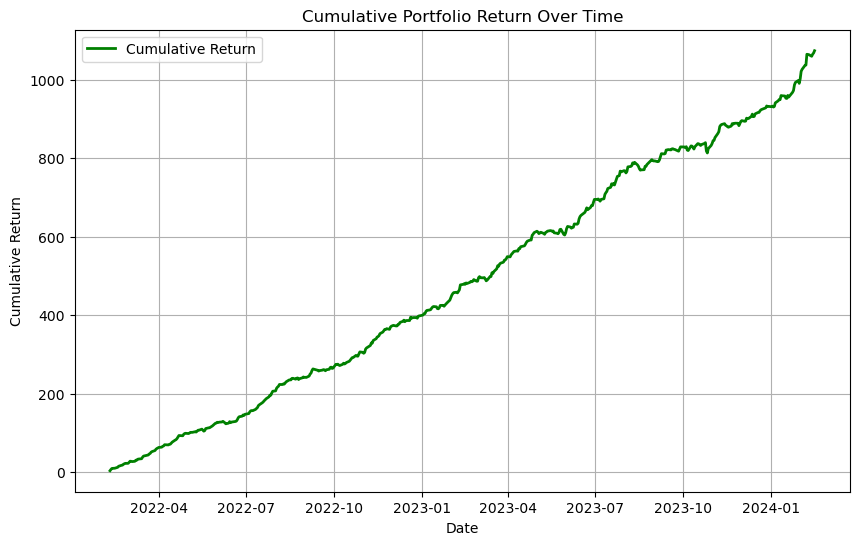

In [100]:
import matplotlib.pyplot as plt
# Calculate the daily returns as the percentage change in Total_Portfolio_Value
portfolio_value_df['Daily_Return'] = portfolio_value_df['Total_Portfolio_Value'].pct_change()

# Calculate cumulative returns based on daily returns, assuming initial investment of 1 (or you could use any starting value)
portfolio_value_df['Cumulative_Return'] = (1 + portfolio_value_df['Daily_Return']).cumprod()

# Plot the Cumulative Return over time
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_df.index, portfolio_value_df['Cumulative_Return'], label='Cumulative Return', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Portfolio Return Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [101]:
first_day_value = (last_price_data.iloc[0] * 1).sum()
print(f'Portfolio value on the first day: ${first_day_value:.2f}')

Portfolio value on the first day: $8678.47


In [102]:
# Get the portfolio value on the second last date in the dataset
second_last_date = last_price_data.index[-2]
second_last_day_value = (last_price_data.loc[second_last_date] * 1).sum()
print(f'Portfolio value on the second last date ({second_last_date}): ${second_last_day_value:.2f}')

Portfolio value on the second last date (2024-02-15 00:00:00): $10535.84


In [103]:
# Print the value of the portfolio at each point in time
print("Portfolio Value at Each Point in Time:")
print(portfolio_value_df['Total_Portfolio_Value'])

# Print the value for the first week
print("\nPortfolio Value for the First Week:")
print(portfolio_value_df['Total_Portfolio_Value'].head(7))

# Print the value for the last week
print("\nPortfolio Value for the Last Week:")
print(portfolio_value_df['Total_Portfolio_Value'].tail(7))

Portfolio Value at Each Point in Time:
Dates
2022-02-08       1591.572
2022-02-09       5796.010
2022-02-10      10922.399
2022-02-11      15115.758
2022-02-14      15943.176
                 ...     
2024-02-09    1694185.430
2024-02-12    1687641.850
2024-02-13    1695800.650
2024-02-14    1700828.260
2024-02-15    1710117.150
Name: Total_Portfolio_Value, Length: 528, dtype: float64

Portfolio Value for the First Week:
Dates
2022-02-08     1591.572
2022-02-09     5796.010
2022-02-10    10922.399
2022-02-11    15115.758
2022-02-14    15943.176
2022-02-15    17245.100
2022-02-16    18337.734
Name: Total_Portfolio_Value, dtype: float64

Portfolio Value for the Last Week:
Dates
2024-02-07    1695674.82
2024-02-08    1695073.79
2024-02-09    1694185.43
2024-02-12    1687641.85
2024-02-13    1695800.65
2024-02-14    1700828.26
2024-02-15    1710117.15
Name: Total_Portfolio_Value, dtype: float64


In [104]:
# Load the 's&p' sheet from the Excel file
try:
    sp_data = pd.read_excel(url, sheet_name='s&p', engine='openpyxl')
    
    # Rename the first column to 'Date' and set it as the index
    sp_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    sp_data.set_index('Date', inplace=True)

    # Drop the column that says '% Returns'
    if '% Returns' in sp_data.columns:
        sp_data.drop(columns=['% Returns'], inplace=True)

    # Display the first few rows to verify it loaded correctly
    print("S&P Data:")
    print(sp_data.head())
except Exception as e:
    print(f"Error: {e}")

# Calculate the cumulative returns for the S&P data
initial_investment = 8678.47

# Calculate daily returns
sp_data['Daily_Return'] = sp_data.iloc[:, 0].pct_change()

# Calculate cumulative returns
sp_data['Cumulative_Return'] = (1 + sp_data['Daily_Return']).cumprod() * initial_investment

# Display the cumulative returns
print("Cumulative Returns for the S&P:")
print(sp_data[['Cumulative_Return']])

S&P Data:
                      Returns 
Date                          
#N/A Connection      4483.8700
2022-02-08 00:00:00  4521.5786
2022-02-09 00:00:00  4587.7886
2022-02-10 00:00:00  4505.2530
2022-02-11 00:00:00  4419.9702
Cumulative Returns for the S&P:
                     Cumulative_Return
Date                                  
#N/A Connection                    NaN
2022-02-08 00:00:00        8751.454487
2022-02-09 00:00:00        8879.603051
2022-02-10 00:00:00        8719.856509
2022-02-11 00:00:00        8554.792798
...                                ...
2024-02-12 00:00:00       10041.390262
2024-02-13 00:00:00        9905.272913
2024-02-14 00:00:00       10002.021691
2024-02-15 00:00:00       10062.509903
2024-02-16 00:00:00       10015.776807

[510 rows x 1 columns]


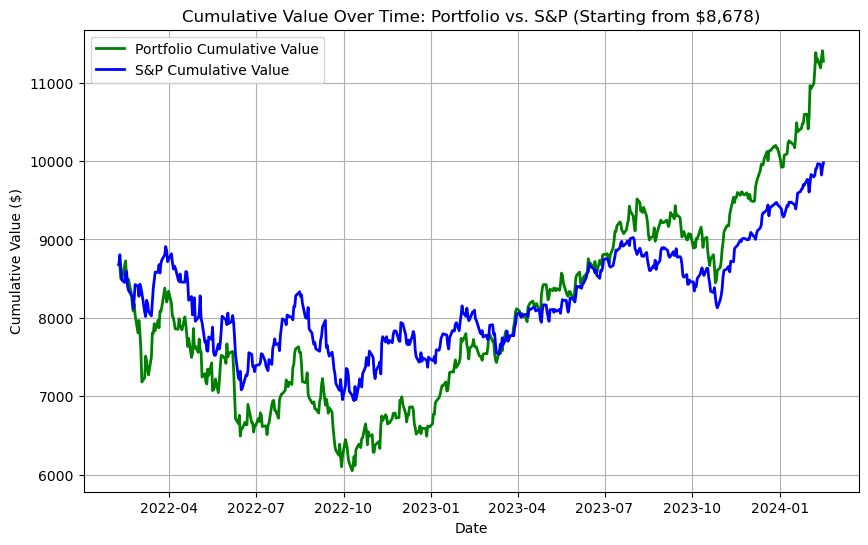

In [105]:
# Load the Excel file from the GitHub URL
last_price_data = pd.read_excel(url, sheet_name='lastprice', skiprows=3, engine='openpyxl')
last_price_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
last_price_data.set_index('Date', inplace=True)
last_price_data = last_price_data.loc[:, ~last_price_data.columns.str.contains('^Unnamed')]
last_price_data.index = pd.to_datetime(last_price_data.index, format='%Y-%m-%d', errors='coerce')
last_price_data = last_price_data.dropna()

# Initialize dataframes for tracking shares and portfolio values
shares_held_df = pd.DataFrame(0, index=trade_signal_df.index, columns=last_price_data.columns)
portfolio_value_df = pd.DataFrame(0.0, index=trade_signal_df.index, columns=last_price_data.columns)

# Set the initial investment amount
initial_investment = 8678.0
cash_balance = initial_investment  # Start with the full initial investment as cash

# Loop through each date and adjust holdings based on signals and available cash
for date in trade_signal_df.index:
    daily_value = 0  # Track the total value of the portfolio for the day
    if date == trade_signal_df.index[0]:  # First day
        for company in last_price_data.columns:
            signal = trade_signal_df.loc[date, f"{company}_Signal"]
            price = last_price_data.loc[date, company] if date in last_price_data.index and company in last_price_data.columns else 0
            if signal == 'Buy' and cash_balance >= price:
                shares_held_df.loc[date, company] = 1  # Buy one share
                cash_balance -= price
            elif signal == 'Short' and cash_balance >= price:
                shares_held_df.loc[date, company] = -1  # Short one share
                cash_balance -= price
            portfolio_value_df.loc[date, company] = shares_held_df.loc[date, company] * price
            daily_value += portfolio_value_df.loc[date, company]
    else:  # For all other days
        prev_date = trade_signal_df.index[trade_signal_df.index.get_loc(date) - 1]
        shares_held_df.loc[date] = shares_held_df.loc[prev_date]  # Carry over previous holdings
        for company in last_price_data.columns:
            signal = trade_signal_df.loc[date, f"{company}_Signal"]
            price = last_price_data.loc[date, company] if date in last_price_data.index and company in last_price_data.columns else 0
            if signal == 'Buy' and cash_balance >= price:
                shares_held_df.loc[date, company] += 1
                cash_balance -= price
            elif signal == 'Short' and cash_balance >= price:
                shares_held_df.loc[date, company] -= 1
                cash_balance -= price
            portfolio_value_df.loc[date, company] = shares_held_df.loc[date, company] * price
            daily_value += portfolio_value_df.loc[date, company]
    # Update the total portfolio value for the day
    portfolio_value_df.loc[date, 'Total_Portfolio_Value'] = daily_value + cash_balance

# Drop the last date to avoid plotting a drop to zero
portfolio_value_df = portfolio_value_df.iloc[:-1]

# Normalize the portfolio cumulative value to start at the initial investment
portfolio_value_df['Normalized_Portfolio_Value'] = portfolio_value_df['Total_Portfolio_Value'] / initial_investment * initial_investment

# Load the S&P data and calculate its normalized cumulative value starting at initial investment
sp_data = pd.read_excel(url, sheet_name='s&p', engine='openpyxl')
sp_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
sp_data.set_index('Date', inplace=True)
sp_data.index = pd.to_datetime(sp_data.index, format='%Y-%m-%d', errors='coerce')
sp_data = sp_data.dropna()

# Normalize the S&P cumulative value to start at the initial investment
sp_data['Normalized_S&P_Value'] = sp_data.iloc[:, 0] / sp_data.iloc[0, 0] * initial_investment

# Drop the last date from S&P data if it has the same issue (optional, for consistency)
sp_data = sp_data.iloc[:-1]

# Plot the cumulative values over time for both the portfolio and the S&P
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_df.index, portfolio_value_df['Normalized_Portfolio_Value'], label='Portfolio Cumulative Value', linewidth=2, color='green')
plt.plot(sp_data.index, sp_data['Normalized_S&P_Value'], label='S&P Cumulative Value', linewidth=2, color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Value ($)')
plt.title('Cumulative Value Over Time: Portfolio vs. S&P (Starting from $8,678)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


                            OLS Regression Results                            
Dep. Variable:      Portfolio_Returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01195
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.913
Time:                        14:55:12   Log-Likelihood:                 1363.9
No. Observations:                 487   AIC:                            -2724.
Df Residuals:                     485   BIC:                            -2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      1.112      0.2

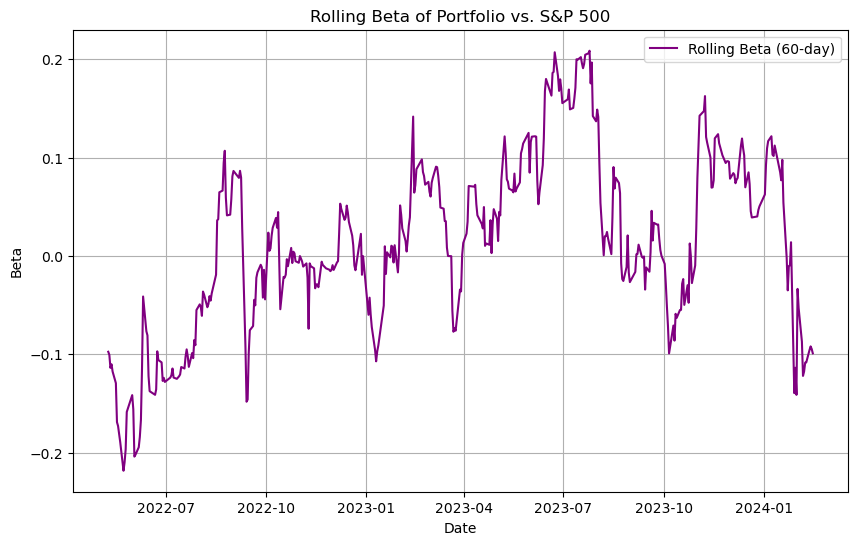

In [106]:
# Align portfolio and S&P returns and drop any rows with missing data
combined_df = pd.DataFrame({'Portfolio_Returns': portfolio_returns, 'SP_Returns': sp_returns}).dropna()

# Check for extreme values or zero returns that may skew the regression
combined_df = combined_df[(combined_df['Portfolio_Returns'] != 0) & (combined_df['SP_Returns'] != 0)]

# Set up the regression model with aligned data
X = combined_df['SP_Returns']
Y = combined_df['Portfolio_Returns']
X = sm.add_constant(X)

# Run the regression
model = sm.OLS(Y, X).fit()
print(model.summary())

# Optional: Calculate rolling beta to observe changes over time
rolling_window = 60  # 60-day rolling window
combined_df['Rolling_Beta'] = (
    combined_df['Portfolio_Returns'].rolling(window=rolling_window).corr(combined_df['SP_Returns'])
)

# Plot the rolling beta
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['Rolling_Beta'], label='Rolling Beta (60-day)', color='purple')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('Rolling Beta of Portfolio vs. S&P 500')
plt.legend()
plt.grid(True)
plt.show()


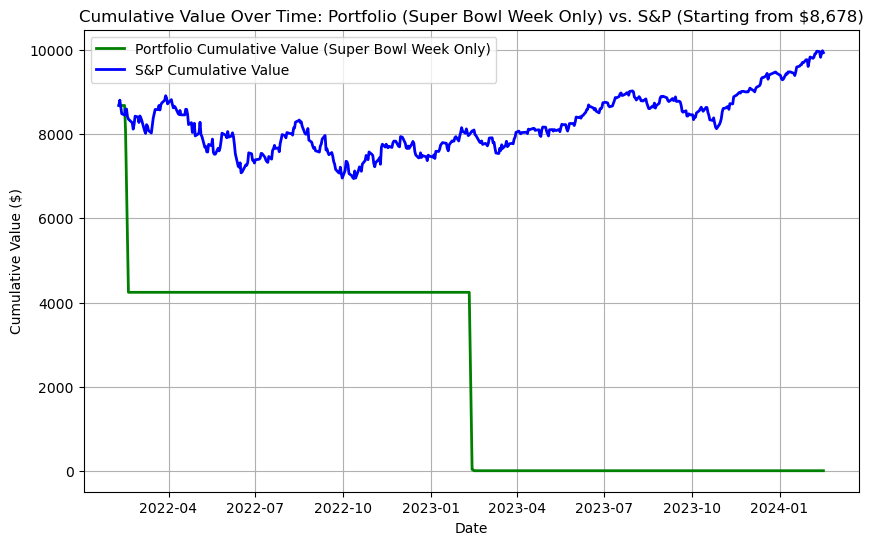

In [107]:
# Define Super Bowl dates and trading weeks
super_bowl_dates = {
    2020: '2020-02-03',
    2021: '2021-02-08',
    2022: '2022-02-14',
    2023: '2023-02-13',
    2024: '2024-02-12'
}

# Convert dates to actual trading weeks (Monday through Friday after each Super Bowl)
trading_weeks = {}
for year, date in super_bowl_dates.items():
    start_date = pd.to_datetime(date)
    trading_weeks[year] = pd.date_range(start=start_date, periods=5, freq='B')  # 5 business days

# Initialize DataFrames for tracking shares and portfolio values
shares_held_df = pd.DataFrame(0, index=trade_signal_df.index, columns=last_price_data.columns)
portfolio_value_df = pd.DataFrame(0.0, index=trade_signal_df.index, columns=last_price_data.columns)

# Set the initial investment amount
initial_investment = 8678.0
cash_balance = initial_investment  # Start with full investment as cash
total_value_history = []  # To keep track of total value over time

# Loop through each date and execute trades during Super Bowl week, holding cash otherwise
for date in trade_signal_df.index:
    # Check if this date is within a Super Bowl trading week
    trading_active = any(date in week for week in trading_weeks.values())
    
    if trading_active:
        daily_value = 0  # Track total portfolio value for the day
        for company in last_price_data.columns:
            signal = trade_signal_df.loc[date, f"{company}_Signal"]
            price = last_price_data.loc[date, company] if date in last_price_data.index and company in last_price_data.columns else 0
            
            if signal == 'Buy' and cash_balance >= price:
                shares_held_df.loc[date, company] += 1
                cash_balance -= price
            elif signal == 'Short' and cash_balance >= price:
                shares_held_df.loc[date, company] -= 1
                cash_balance -= price
            
            portfolio_value_df.loc[date, company] = shares_held_df.loc[date, company] * price
            daily_value += portfolio_value_df.loc[date, company]
        
        # Update the total value to include cash balance
        total_value = daily_value + cash_balance
    else:
        # If it's outside of Super Bowl week, just carry the last portfolio value
        total_value = total_value_history[-1] if total_value_history else initial_investment
    
    # Append to the history and set for plotting
    total_value_history.append(total_value)
    portfolio_value_df.loc[date, 'Total_Portfolio_Value'] = total_value

# Create a normalized cumulative value column for plotting
portfolio_value_df['Normalized_Portfolio_Value'] = portfolio_value_df['Total_Portfolio_Value'] / initial_investment * initial_investment

# Load and process S&P data for comparison
sp_data = pd.read_excel(url, sheet_name='s&p', engine='openpyxl')
sp_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
sp_data.set_index('Date', inplace=True)
sp_data.index = pd.to_datetime(sp_data.index, format='%Y-%m-%d', errors='coerce')
sp_data = sp_data.dropna()

# Normalize the S&P cumulative value to start at the initial investment
sp_data['Normalized_S&P_Value'] = sp_data.iloc[:, 0] / sp_data.iloc[0, 0] * initial_investment

# Plot the cumulative values over time for both the portfolio and the S&P
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_df.index, portfolio_value_df['Normalized_Portfolio_Value'], label='Portfolio Cumulative Value (Super Bowl Week Only)', linewidth=2, color='green')
plt.plot(sp_data.index, sp_data['Normalized_S&P_Value'], label='S&P Cumulative Value', linewidth=2, color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Value ($)')
plt.title('Cumulative Value Over Time: Portfolio (Super Bowl Week Only) vs. S&P (Starting from $8,678)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

